### 9.2 Bộ nhớ Ngắn hạn Dài LSTM

- Thách thức đối với việc lưu trữ những thông tin dài hạn và bỏ qua đầu vào ngắn hạn trong các mô hình biến tiềm ẩn đã tồn tại trong một thời gian dài. Một trong những phương pháp tiếp cận sớm nhất để giải quyết vấn đề này là LSTM. Nó có nhiều tính chất tương tự như Nút Hồi tiếp có Cổng GRU. 

#### 9.2.1 Các Ô nhớ có Cổng

- Ba cổng được gưới thiệu trong LSTM là:
    1. Cổng đầu vào
    2. Cổng quên
    3. Cổng đầu ra
- Bên cạnh đó, ta sẽ giới thiệu một ô nhớ có kích thước giống với trạng thái ẩn. Nói đúng hơn thì đây chỉ là phiên bản đặc biệt hơn của trạng thái ẩn, được thiết kế để ghi lại các thông tin bổ sung.

#### 9.2.1.1 Cổng đầu vào, cổng quên và cổng đầu ra

- Tương tự như GRU, dữ liệu dược đưa vào các cổng LSTM là đầu vào ở bước thời gian hiện tại X_t và trạng thái ẩn ở bước thời gian trước đó là H_(t - 1).
- Những đầu vào này được xử lý bởi một tầng kết nối đầy đủ và một hàm kích hoạt sigmoid để tính toán các giá trị của các cổng đầu vào, cổng quên và cổng đầu ra.
- Kết quả là, tất cả các giá trị đầu ra tại ba cổng đều nằm trong khoảng [0, 1]. Hình dưới minh họa luồng dữ liệu cho các các cổng đầu vào, cổng quên và cổng đầu ra.

    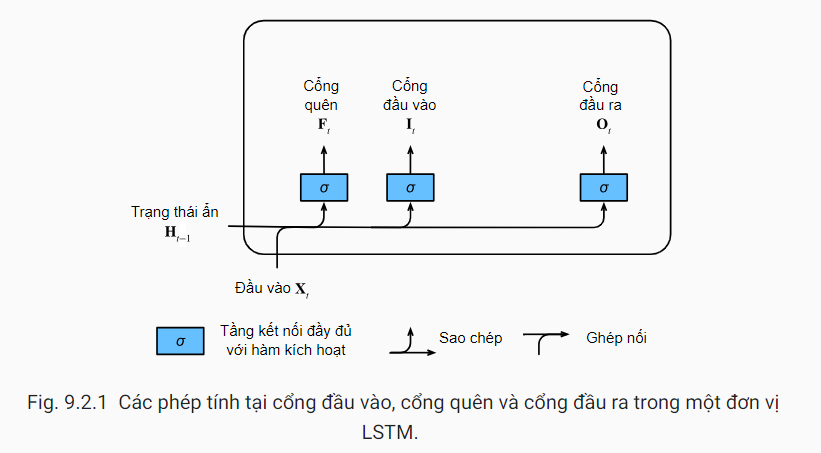

- Chúng ta giả sử rằng có h nút ẩn, mỗi minibatch có kích thước n và kích thước đầu vào là d. Như vậy, đầu vào là X_t (n x d) và trạng thái ẩn của bước thời gian trước đó là H_(t - 1) (n x h). Tương tự, các cổng được định nghĩa như sau: 
    1. Cổng đầu vào là I_t (n x h)
    2. Cổng quên là F_t (n x h)
    3. Cổng đầu ra O_t (n x h)

    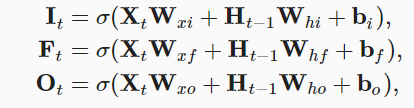

    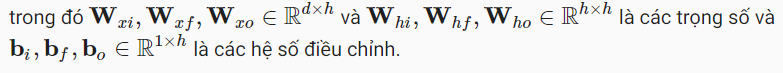

#### 9.2.1.2 Ô nhớ tiềm năng
- Ký hiệu là 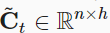. Tính như các cổng trên nhưng sử dụng hàm kích hoạt __tanh__ với miền giá trị nằm trong khoảng [-1, 1]. Điều này dẫn đến phương trình sau tại bước thời gian t.

    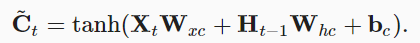

    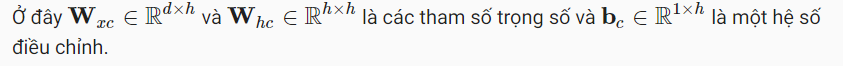

    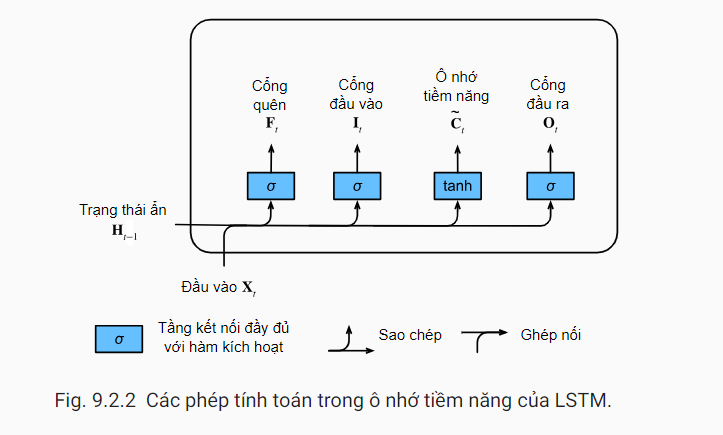

#### 9.2.1.3 Ô nhớ
- Trong GRU, chúng ta chỉ có một cơ chế duy nhất để quản lý cả việc nhớ và quên. 
- Trong LSTM, chúng ta có: 
    + Tham số I_t điều chỉnh lượng dữ liệu mới được lấy vào thông qua 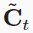 
    + Tham số quên F_t chỉ định lượng thông tin cũ cần giữ lại trong ô nhớ 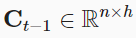
- Sử dụng cùng một phép nhân theo từng điểm point wise, ta đi đến phương trình cập nhật như sau:

    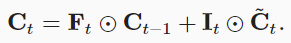

- Nếu giá trị ở cổng quên luôn xấp xỉ bằng 1 và cổng đầu vào luôn xấp xỉ bằng 0 thì giá trị ô nhớ trong quá khứ C_(t - 1) sẽ được lưu lại qua thời gian và truyền đến bước thời gian hiện tại. 
- Thiết kế này được giới thiệu nhằm giảm bớt vấn đề tiêu biến gradient cũng như nắm bắt được các phụ thuộc dài hạn trong chuỗi, ta có sơ đồ luồng như sau:

    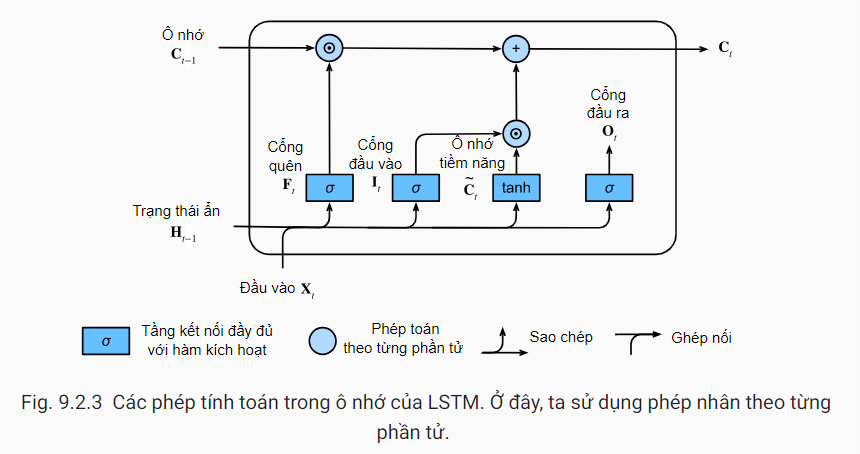

#### 9.2.1.4 Các trạng thái ẩn
- Cuối cùng, ta cần phải xác định cách tính trạng thái ẩn H_t (n x h). Đây là nơi cổng đầu ra được sử dụng. 
- Trong LSTM, đây chỉ đơn giản là một phiên bản có kiểm soát của hàm kích hoạt tanh trong ô nhớ. Điều này đảm bảo rằng các giá trị của H_t luôn nằm trong khoảng (-1, 1).

    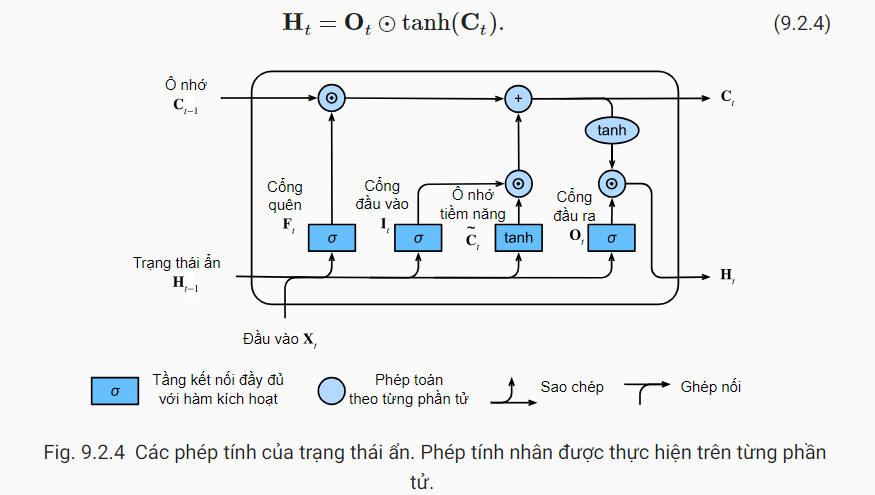